# Step 1: Import Libraries and Load dataset:
We begin by importing the required Python Libraries for data analysis and visualization.Then we load the dataset and display its first rows

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("StudentsPerformance.csv")   #Load the CSV file
df.head()                                   #to display the first 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Step 2: Clean the Data:

To make our data easier to work with, we:

Convert all column names to lowercase
Replace spaces with underscores
We also check for missing values.

In [3]:
#---> CLEANING THE DATA

df.columns=df.columns.str.lower().str.replace(" ","__")
df.isnull().sum()

gender                            0
race/ethnicity                    0
parental__level__of__education    0
lunch                             0
test__preparation__course         0
math__score                       0
reading__score                    0
writing__score                    0
dtype: int64

In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental__level__of__education', 'lunch',
       'test__preparation__course', 'math__score', 'reading__score',
       'writing__score'],
      dtype='object')

In [15]:
# Clean column names: lowercase, strip spaces, and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [5]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental__level__of__education', 'lunch',
       'test__preparation__course', 'math__score', 'reading__score',
       'writing__score'],
      dtype='object')


In [6]:
for col in df.columns:
    print(repr(col))

'gender'
'race/ethnicity'
'parental__level__of__education'
'lunch'
'test__preparation__course'
'math__score'
'reading__score'
'writing__score'


In [22]:
df.columns = df.columns.astype(str).str.replace('\xa0', ' ').str.strip().str.lower().str.replace(r'\s+', '_', regex=True)

In [26]:
for col in df.columns:
    print(repr(col))

'gender'
'race/ethnicity'
'parental__level__of__education'
'lunch'
'test__preparation__course'
'math__score'
'reading__score'
'writing__score'


In [28]:
df.columns = df.columns.astype(str)\
    .str.replace('\u00a0', '', regex=False)\
    .str.strip()\
    .str.lower()\
    .str.replace(r'\s+', '_', regex=True)

# Step 3: Create Average Score and Pass/Fail Column:

We create two new columns:
average__score: the average of math, reading, and writing scores
pass__fail: a binary indicator (1 for pass if average ≥ 40, else 0)

In [33]:
# Create average score
df['average__score'] = (df['math__score'] + df['reading__score'] + df['writing__score']) / 3

# Create pass/fail label
df['pass__fail'] = df['average__score'].apply(lambda x: 1 if x >= 40 else 0)

# Display
df[['math__score', 'reading__score', 'writing__score', 'average__score', 'pass__fail']].head()

,math__score,reading__score,writing__score,average__score,pass__fail
0,72,72,74,72.666667,1
1,69,90,88,82.333333,1
2,90,95,93,92.666667,1
3,47,57,44,49.333333,1
4,76,78,75,76.333333,1


In [30]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental__level__of__education', 'lunch',
       'test__preparation__course', 'math__score', 'reading__score',
       'writing__score'],
      dtype='object')


# Step 4: Exploratory Data Analysis (EDA)

We explore the dataset through visualizations:
Distribution of average scores
Comparison of average scores by gender
Pass/fail breakdown by parental level of education
These plots help us understand the data and its patterns.

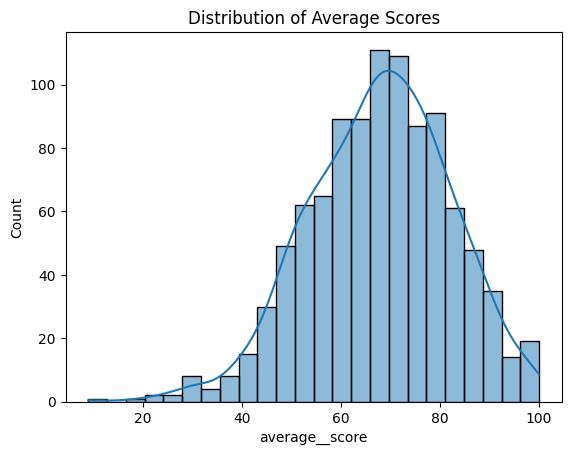

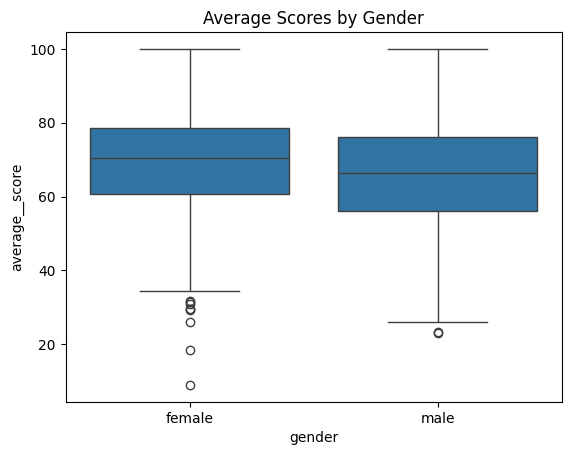

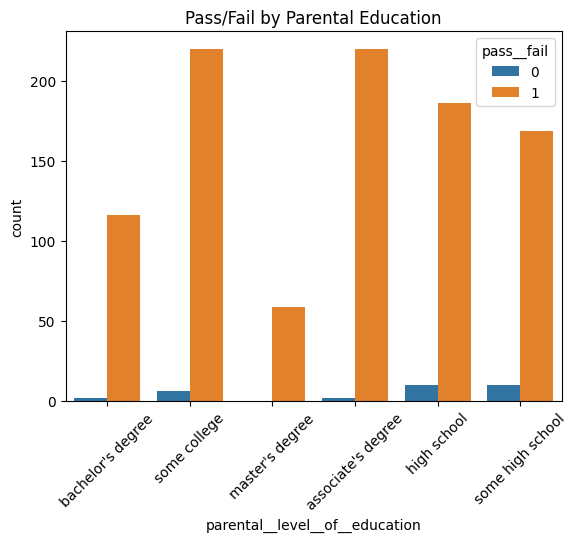

In [35]:
#EDA 
# Plot score distribution
sns.histplot(df['average__score'], kde=True)
plt.title("Distribution of Average Scores")
plt.show()

# Gender vs Average Score
sns.boxplot(x='gender', y='average__score', data=df)
plt.title("Average Scores by Gender")
plt.show()

# Pass/Fail by parental education
sns.countplot(x='parental__level__of__education', hue='pass__fail', data=df)
plt.title("Pass/Fail by Parental Education")
plt.xticks(rotation=45)
plt.show()

# Step 5: Prepare Data for Machine Learning

Before training a model, we:
Separate features (X) and the target label (y)
Convert categorical variables into numeric format using one-hot encoding

In [40]:
#Prepare Data for ML
# Drop average_score and pass_fail from features
X = df.drop(['average__score', 'pass__fail'], axis=1)

# Convert categorical columns to numeric (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Set target variable
y = df['pass__fail']

# Step 6: Train-Test Split and Train the Model

We split the data into training and testing sets (80-20 split), then train a Random Forest Classifier on the training data.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model and train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 7: Evaluate the Model

We evaluate our trained model using:
Accuracy,
F1 Score,
Confusion Matrix,
These metrics help us understand how well the model is performing.

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Predict on test set
y_pred = model.predict(X_test)

# Show results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.995
F1 Score: 0.9973753280839895
Confusion Matrix:
 [[  9   1]
 [  0 190]]
